## Install Requaired the Libraries 

In [1]:
pip install numpy opencv-python matplotlib tensorflow keras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Import the Libraries 

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.preprocessing.image import img_to_array, load_img


## Use the U-Net Model and Architecture 

In [3]:
def unet_model(input_size=(256, 256, 3)):
    inputs = Input(input_size)
    
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
    
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
    
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)
    
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)
    
    u6 = UpSampling2D((2, 2))(c5)
    u6 = Concatenate()([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)
    
    u7 = UpSampling2D((2, 2))(c6)
    u7 = Concatenate()([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)
    
    u8 = UpSampling2D((2, 2))(c7)
    u8 = Concatenate()([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)
    
    u9 = UpSampling2D((2, 2))(c8)
    u9 = Concatenate()([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 256, 256, 64)      │           1,792 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 256, 256, 64)      │          36,928 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 128, 128, 64)      │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 128, 128, 128)     │          73,856 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 128, 128, 128)     │         147,584 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 64, 64, 128)       │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 64, 64, 256)       │         295,168 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 64, 64, 256)       │         590,080 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 32, 32, 256)       │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 32, 32, 512)       │       1,180,160 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 32, 32, 512)       │       2,359,808 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 16, 16, 512)       │               0 │ conv2d_7[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 16, 16, 1024)      │       4,719,616 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_9 (Conv2D)             │ (None, 16, 16, 1024)      │       9,438,208 │ conv2d_8[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ up_sampling2d (UpSampling2D)  │ (None, 32, 32, 1024)      │               

 Total params: 31,378,945 (119.70 MB)

 Trainable params: 31,378,945 (119.70 MB)

 Non-trainable params: 0 (0.00 B)

# Load and  process of the Dataset 

In [5]:
def load_images(image_paths, mask_paths, image_size=(256, 256)):
    images = []
    masks = []
    
    for img_path, mask_path in zip(image_paths, mask_paths):
        image = load_img(img_path, target_size=image_size)
        mask = load_img(mask_path, target_size=image_size, color_mode="grayscale")
        
        image = img_to_array(image) / 255.0
        mask = img_to_array(mask) / 255.0
        
        images.append(image)
        masks.append(mask)
    
    return np.array(images), np.array(masks)

# Example image and mask paths
image_paths = ['images/fotolia_137840668.jpg', 'images/fotolia_168667147.jpg']
mask_paths = ['mask/watermark.png']

images, masks = load_images(image_paths, mask_paths)


## Train the Model 

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6714 - loss: 0.4381
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6714 - loss: 0.4364
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6714 - loss: 0.4339
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6714 - loss: 0.4305
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6714 - loss: 0.4279
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6714 - loss: 0.4245
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6714 - loss: 0.4193
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6714 - loss: 0.4120
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6714 - loss: 0.4311
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6714 - loss: 0.4123
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6714 - loss: 0.5042
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6714 - loss: 0.4286
Epoch 13/20
1/1 ━━━━━━━━━

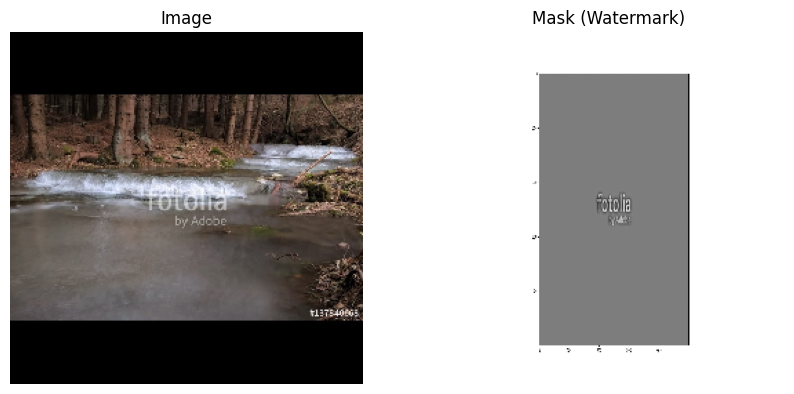

In [17]:
import matplotlib.pyplot as plt

# Train the model using the entire dataset
history = model.fit(images, masks, epochs=20, batch_size=2)

# Visualize some example images and their masks
num_examples = min(5, len(images))  # Number of examples to visualize, limited to the number of available images
indices_to_visualize = list(range(num_examples))  # Use the first few images for consistent visualization

for i in indices_to_visualize:
    # Get the image and mask
    image = images[i]
    mask = masks[i]
    
    # Display the image and mask
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(mask.squeeze(), cmap='gray')
    plt.title('Mask (Watermark)')
    plt.axis('off')
    
    plt.show()


## Importing Libraries and Defining Functions( Removal Part )

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.models import load_model

def remove_watermark(image_path, model_path, image_size=(256, 256)):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not read image {image_path}")
    original_image = image.copy()  # Keep a copy of the original image
    
    # Resize the image
    resized_image = cv2.resize(image, image_size)
    
    # Normalize the resized image
    normalized_image = resized_image / 255.0
    
    # Load the model
    model = load_model(model_path)
    
    # Predict the mask
    predicted_mask = model.predict(np.expand_dims(normalized_image, axis=0))[0]
    predicted_mask = (predicted_mask > 0.5).astype(np.uint8)
    
    # Check the predicted mask values
    print(f"Predicted mask unique values: {np.unique(predicted_mask)}")
    
    # Resize the predicted mask to match the dimensions of the input image
    predicted_mask = cv2.resize(predicted_mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
    
    # Find the bounding box of the watermark using the predicted mask
    contours, _ = cv2.findContours(predicted_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # Get the largest contour which should be the watermark
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        # Draw a red rectangle around the watermark
        cv2.rectangle(original_image, (x, y), (x + w, y + h), (0, 0, 255), 2)
    else:
        print("No contours found. The predicted mask might be incorrect.")
    
    # Inpaint the watermark region
    inpainted_image = cv2.inpaint(image, predicted_mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
    
    return original_image, inpainted_image, predicted_mask, (x, y, w, h)


## Watermark idintify & Removing Watermark and Saving the Results in System 

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted mask unique values: [1]
An error occurred while processing images/fotolia_168667147.jpg: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - cvtColor() missing required argument 'code' (pos 2)
>  - cvtColor() missing required argument 'code' (pos 2)



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted mask unique values: [1]
An error occurred while processing images/fotolia_137840668.jpg: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - cvtColor() missing required argument 'code' (pos 2)
>  - cvtColor() missing required argument 'code' (pos 2)



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted mask unique values: [1]
An error occurred while processing images/fotolia_168667186.jpg: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - cvtColor() missing required argument 'code' (pos 2)
>  - cvtColor() missing required argument 'code' (pos 2)



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted mask unique values: [1]
An error occurred while processing images/crop watermark/watermark.png: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - cvtColor() missing required argument 'code' (pos 2)
>  - cvtColor() missing required argument 'code' (pos 2)



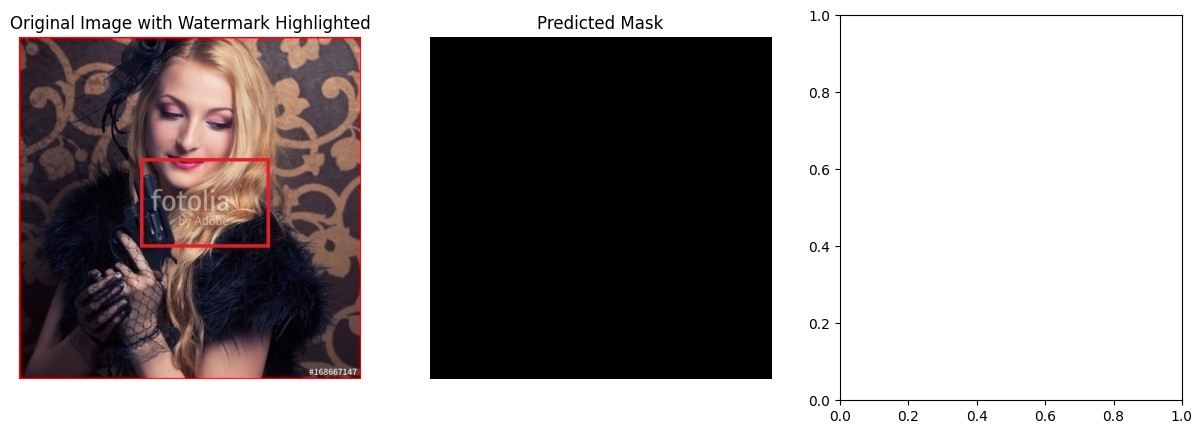

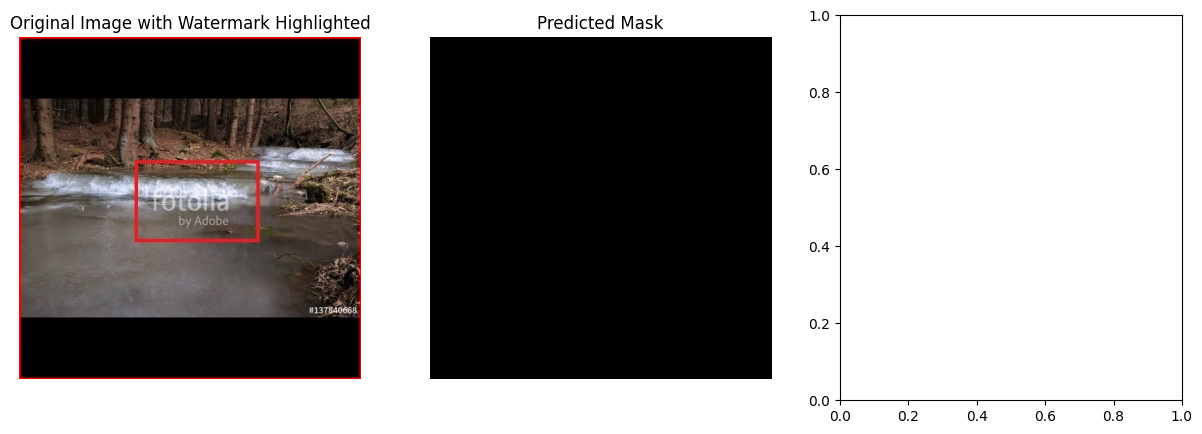

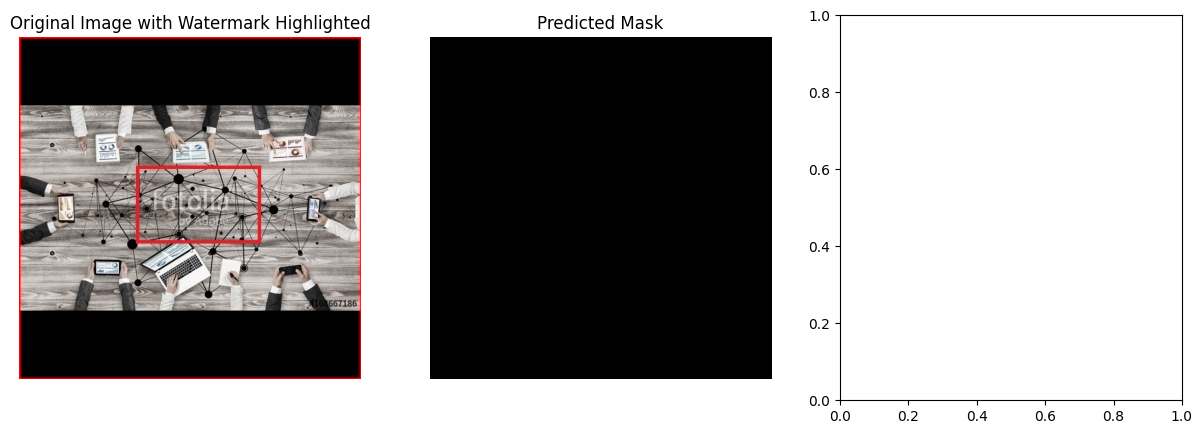

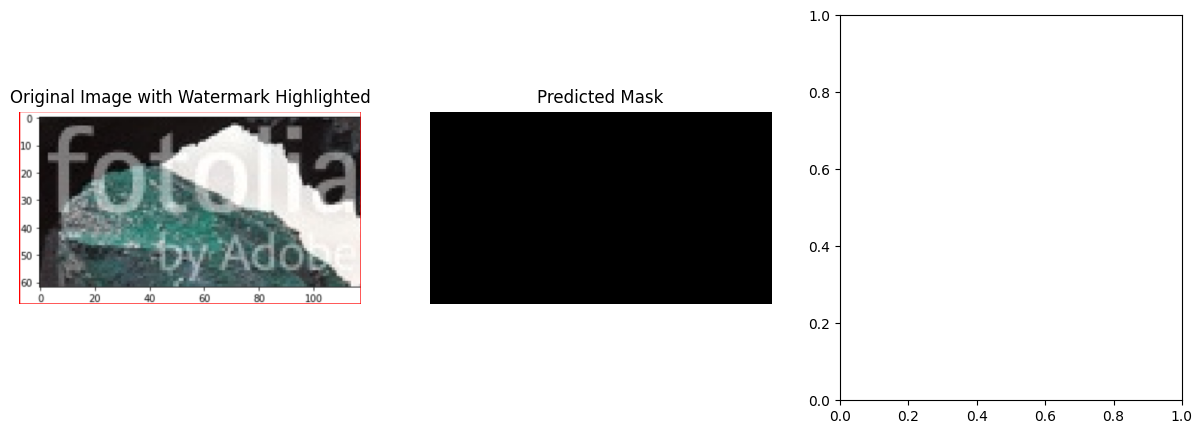

In [16]:
# List of image paths
image_paths = ['images/fotolia_168667147.jpg', 'images/fotolia_137840668.jpg', 'images/fotolia_168667186.jpg','images/crop watermark/watermark.png']  # Add more paths as needed

# Path to the trained watermark removal model
model_path = 'model/single_sample_model.h5'  # Replace with your actual model path

# Loop through the list of image paths and remove watermarks
for image_path in image_paths:
    try:
        # Remove the watermark
        original_image, inpainted_image, predicted_mask, bbox = remove_watermark(image_path, model_path)
        
        # Display the original image, mask, and inpainted image
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
        plt.title('Original Image with Watermark Highlighted')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(predicted_mask, cmap='gray')  # Display the predicted mask
        plt.title('Predicted Mask')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(inpainted_image ))  #  BGR  for display
        plt.title('save the Watermark remove image in system ')
        plt.axis('off')

        plt.show()

        # Save the results
        original_output_path = image_path.replace('.png', '_original.png')
        inpainted_output_path = image_path.replace('.png', '_no_watermark.png')
        
        cv2.imwrite(original_output_path, original_image)
        cv2.imwrite(inpainted_output_path, inpainted_image)
    except Exception as e:
        print(f"An error occurred while processing {image_path}: {e}")


## Cropping and Shaping Watermark Area

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted mask unique values: [1]


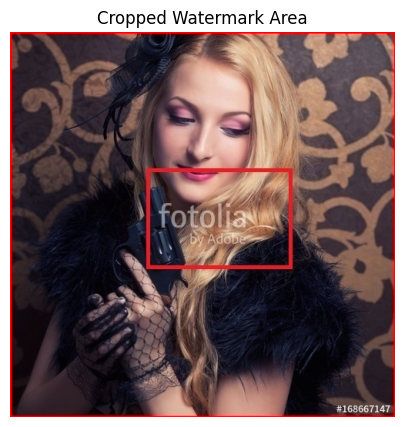

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted mask unique values: [1]


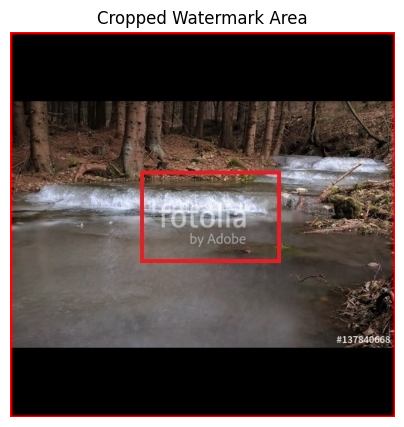

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted mask unique values: [1]


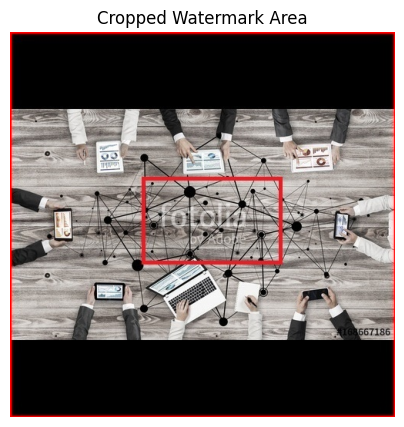

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted mask unique values: [1]


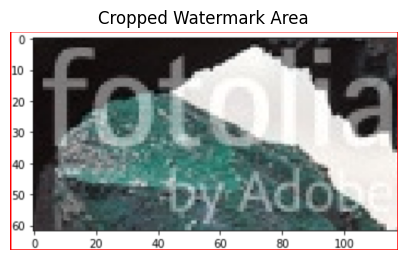

In [17]:
# crop Watermark the image path 
image_path = 'images/crop watermark/watermark.png'

# Loop through the list of image paths to crop and shape the watermark area
for image_path in image_paths:
    try:
        # Remove the watermark (this part can be skipped if already done and results saved)
        original_image, inpainted_image, predicted_mask, bbox = remove_watermark(image_path, model_path)
        
        # Crop the watermark area
        x, y, w, h = bbox
        cropped_image = original_image[y:y+h, x:x+w]
        
        # Display the cropped image
        plt.figure(figsize=(5, 5))
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
        plt.title('Cropped Watermark Area')
        plt.axis('off')
        plt.show()

        # Save the cropped image
        cropped_output_path = image_path.replace('.png', '_watermark_cropped.png')
        cv2.imwrite(cropped_output_path, cropped_image)
    except Exception as e:
        print(f"An error occurred while processing {image_path}: {e}")
